# Visualise Metric CSV

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np

### Choose Metrics


In [19]:

# metric = "test_metrics_mean"
# column_name = "test/acc/ave"

# metric = "test_forgetting_ratio_mean"
# column_name = "test/fr/ave"


# metric = "test_fm_mean"
# column_name = "fm"

# metric = "test_im_mean"
# column_name = "im"

metric = "test_bwt_mean"
column_name = "bwt"

# metric = "test_fwt_mean"
# column_name = "fwt"

### Choose Experiments

In [21]:
# Mean Baselines (20 tasks, epoch=2)
baselines = [
    "Finetuning_1",
    "LwF_1",
    "EWC_1", 
    "HAT_1", 
    "ada", 
    "ada_cons_1",
    "ada_cons_alpha",
    "ada_cons_alpha_all",
    "ada_random",    
    "ada_random_all",
    "Random_1",
]

legend_list = [
    "Finetuning",
    "LwF",
    "EWC", 
    "HAT", 
    "AdaHAT", 
    "HAT_cons_1",
    "HAT_cons_alpha",
    "HAT_cons_alpha_all",
    "HAT_random",
    "HAT_random_all",
    "Random",
]
csv_path_list = [f"../../logs_saved/pmnist/{b}/runs/{metric}.csv" for b in baselines]


In [20]:
# Mean Ablations (20 tasks, epoch=2)
baselines = [
    # "Finetuning_1",
    "HAT_1", 
    "ada", 
    # "ada_reg_0",
    # "ada_reg_1",
    "ada_reg_09",
    # "ada_sum_1",
    "ada_sum_t",
]

legend_list = [
    # "Finetuning",
    "HAT", 
    "AdaHAT", 
    # "AdaHAT_reg_0",
    # "AdaHAT_reg_1",
    "AdaHAT_reg_09",
    # "AdaHAT_sum_1",
    "AdaHAT_sum_t",
]
csv_path_list = [f"../../logs_saved/pmnist/{b}/runs/{metric}.csv" for b in baselines]


In [8]:
# Hyperparameter study on AdaHAT (20 tasks, epoch=2)
baselines = [
    "1e-6",
    # "2e-6",
    # "3e-6",
    # "4e-6",
    # "5e-6",
    # "6e-6",
    # "7e-6",
    # "8e-6",
    # "9e-6",
    # "1e-5",
    "1e-7",
    "2e-7",
    "3e-7",
    "4e-7",
    "5e-7",
    "6e-7",
    "7e-7",
    "8e-7",
    "9e-7",
]


legend_list = [
    "1e-6",
    # "2e-6",
    # "3e-6",
    # "4e-6",
    # "5e-6",
    # "6e-6",
    # "7e-6",
    # "8e-6",
    # "9e-6",
    # "1e-5",
    "1e-7",
    "2e-7",
    "3e-7",
    "4e-7",
    "5e-7",
    "6e-7",
    "7e-7",
    "8e-7",
    "9e-7",
]

csv_path_list = [f"../../logs_saved/s20/hparams_study/runs/{b}/csv/{metric}.csv" for b in baselines]



### Plot

-0.42353999316692353
-0.5284400023519993
-0.5624033376574517
-0.5880475014448165
-0.5877159997820854
-0.605866667876641
-0.6157385723931449
-0.6275350005365908
-0.6273600002129873
-0.6396150004863739
-0.6434290927580812
-0.6481766654799382
-0.6419292305811093
-0.6583271420693824
-0.6713339991370837
-0.6668343733530492
-0.670885881781578
-0.673314443954991
-0.6809878941821425
-0.6751374996826052
-0.6801985704650482
-0.6746609096161345
-0.6789721740328748
-0.682625834364444
-0.6831084002256393
-0.6834149996535136
-0.6848959279833016
-0.6925978576365326
-0.690375863067035
-0.6925366661200921
-0.6968593553189308
-0.7022253118804656
-0.7056012125177816
-0.7011329409830711
-0.7077342855611019
-0.7113772218529549
-0.7134791895143084
-0.7106097364700155
-0.7149925649070588
-0.7195650010276585
-0.7225331708243707
-0.7223240485680955
-0.7230532566128776
-0.7241822735067796
-0.7232353342903985
-0.7243230434134602
-0.7272725538132672
-0.7242618761491031
-0.7327371433681371
-0.2298000037670135
-0.4

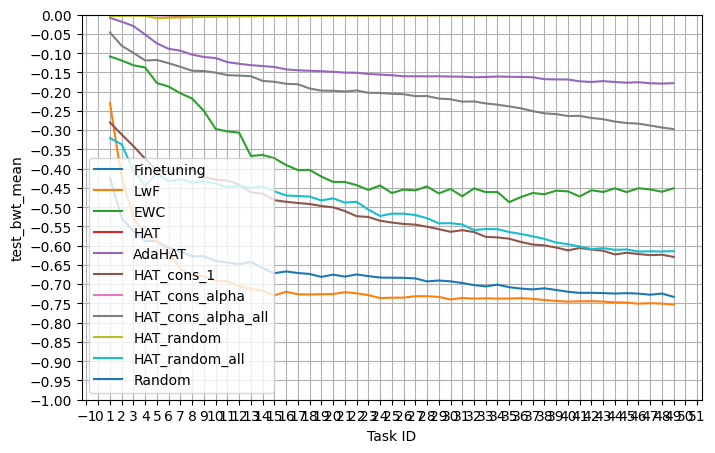

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# global settings
ax.grid(True)
ax.set_title("")
ax.set_xlabel("Task ID")
ax.set_ylabel(f"{metric}")
plt.xticks(range(0, 51, 5))  # 设置 x 轴刻度，每隔5个单位显示一个标签
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(-1, 0)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))


for csv_path, legend in zip(csv_path_list, legend_list):
    
    # read csv
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        task_column = [int(float(row["task"])) for row in reader]

    with open(csv_path) as csvfile:   
        reader = csv.DictReader(csvfile)
        metric_column = []
        for row in reader:
            if row[column_name]:
                print(row[column_name])
                metric_column.append(float(row[column_name]))
            else:
                metric_column.append(np.nan)
        
    # plot
    ax.plot(task_column, metric_column, label=legend)
    ax.legend()
    
    

plt.show()


## Others

In [ ]:
# Finetuning_1 multiruns (10tasks, epoch=9)

metric = "test_metrics"
# metric = "test_forgetting_ratio"


csv_path_list = ["../../logs_saved/summary/Finetuning_1/runs/1/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/2/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/3/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/4/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/5/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/6/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/7/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/8/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/9/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
                 "../../logs_saved/summary/Finetuning_1/runs/10/csv/test_metrics.csv",
]
legend_list = ["run 1", "run 2", "run 3", "run 4", "run 5", "run 6", "run 7", "run 8", "run 9", "run 10"]

In [ ]:
# All methods mean(20 tasks, epoch=2)

metric = "test_metrics"
# metric = "test_forgetting_ratio"
# metric = "test_fm_mean"
# metric = "test_forgetting_ratio"
# metric = "test_forgetting_ratio"
# metric = "test_forgetting_ratio"





baselines = [
    "Finetuning_1",
    "EWC_1", 
    "HAT_1", 
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]

csv_path_list = [f"../../logs_saved/s/{b}/runs/{metric}.csv" for b in baselines]

legend_list = [
    "Finetuning", 
    "EWC", 
    "HAT",
    "ada", 
    "ada_ave", 
    "ada_prob", 
    "ada_ave_prob", 
    "ada_cons_alpha_all",
    "ada_random_all",
    "ada_reg_1",
    "ada_reg_0",
    "ada_sum_1",
    "ada_sum_t",
]
y_label = "Average Accuracy Over Tasks"
